In [1]:
library(Seurat)  
library(Signac)   
library(Matrix)  
library(magrittr)  
library(readr)  
library(tidyr)  
library(dplyr)
library(AnnotationHub)  
library(EnsDb.Hsapiens.v86)
library(ggforce)
library(stringr)

Loading required package: SeuratObject

Loading required package: sp




Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, 

读取RDS做link

In [2]:
library(GenomicRanges)  
library(dplyr)

scATAC <- readRDS("/home/share/huadjyin/home/lutianyu/01HIV/02data/atac/signac_sub3000_L3_Frag.rds")
scATAC

An object of class Seurat 
354782 features across 256394 samples within 1 assay 
Active assay: peaks (354782 features, 0 variable features)
 2 layers present: counts, data

In [3]:
# 提取所有的细胞类型（去掉后缀部分）  
celltypes <- unique(gsub("-HDs|-IRs|-INRs", "", scATAC@meta.data$celltypeL3_stage))  

# 构建顺序
ordered_levels <- unlist(lapply(celltypes, function(ct) {  
  paste0(ct, c("-INRs","-IRs","-HDs"))  
}))

# 设置 celltypeL3_stage 为因子，并按照构建的顺序排列  
scATAC@meta.data$celltypeL3_stage <- factor(  
  scATAC@meta.data$celltypeL3_stage,  
  levels = ordered_levels  
)

In [ ]:
# 做个简单的图测试下
CoveragePlot(
  object = scATAC,
  region = "CD4",
  #region.highlight = regions_highlight,
  extend.upstream = 1000,
  extend.downstream = 1000,
  group.by = "celltypeL3_stage" 
)
# 没问题

# global的score

In [ ]:
library(dplyr)
peak2gene <- read.table("/home/share/huadjyin/home/lutianyu/01HIV/02data/all_filtered/00summary.txt", header = TRUE)


In [ ]:
sub_peak2gene <- subset(peak2gene, symbol == "TNFAIP3")
names(sub_peak2gene) <- c("gene", "Region", "score")
sub_peak2gene$gene_tss <- 137867214

region_split <- strsplit(sub_peak2gene$Region, "[:-]")
sub_peak2gene$seqnames <- sapply(region_split, `[`, 1)  # 提取染色体名称
sub_peak2gene$peakstart <- as.numeric(sapply(region_split, `[`, 2))  # 提取起始位置
sub_peak2gene$peakend <- as.numeric(sapply(region_split, `[`, 3))  # 提取终止位置

# 创建 start 和 end 列
sub_peak2gene$start <- ifelse(
  sub_peak2gene$peakstart > sub_peak2gene$gene_tss,
  sub_peak2gene$gene_tss,  # 如果 peakstart > gene_tss，start = gene_tss
  sub_peak2gene$peakstart  # 否则，start = peakstart
)

sub_peak2gene$end <- ifelse(
  sub_peak2gene$peakstart > sub_peak2gene$gene_tss,
  sub_peak2gene$peakstart,  # 如果 peakstart > gene_tss，end = peakstart
  sub_peak2gene$gene_tss    # 否则，end = gene_tss
)
sub_peak2gene

,gene,Region,score,gene_tss,seqnames,peakstart,peakend,start,end
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4127,TNFAIP3,chr6:137811323-137811824,0.0957641602,137867214,chr6,137811323,137811824,137811323,137867214
4128,TNFAIP3,chr6:137940171-137940672,0.0025920868,137867214,chr6,137940171,137940672,137867214,137940171
4129,TNFAIP3,chr6:137715658-137716159,0.3027343750,137867214,chr6,137715658,137716159,137715658,137867214
4130,TNFAIP3,chr6:137950988-137951489,0.0229797363,137867214,chr6,137950988,137951489,137867214,137950988
4131,TNFAIP3,chr6:137970306-137970807,0.0041656494,137867214,chr6,137970306,137970807,137867214,137970306
4132,TNFAIP3,chr6:137799901-137800402,0.0174102783,137867214,chr6,137799901,137800402,137799901,137867214
4133,TNFAIP3,chr6:137707905-137708406,0.0752563477,137867214,chr6,137707905,137708406,137707905,137867214
4134,TNFAIP3,chr6:137762417-137762918,0.0330505371,137867214,chr6,137762417,137762918,137762417,137867214
4135,TNFAIP3,chr6:137957368-137957869,0.0014429092,137867214,chr6,137957368,137957869,137867214,137957368


挑选出permutation有意义的peak

In [ ]:
per_peak <- read.csv("/home/share/huadjyin/home/lutianyu/01HIV/02data/downstream/permutaion/TNFAIP3/CD8_CTL-GZMB.csv")
per_peak$peak_id <- sub("-", ":", per_peak$peak_id)

filtered_per_peak <- per_peak[per_peak$p_value < 0.05, ]
filtered_per_peak


,peak_id,gene_id,observed_correlation,mean_background_correlation,std_background_correlation,z_score,p_value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr6:137799901-137800402,TNFAIP3,0.44212769,0.25298501,0.07453543,2.537621,1.116087e-02
2,chr6:137791753-137792254,TNFAIP3,0.38590189,0.19774283,0.05818789,3.233646,1.222208e-03
5,chr6:137762417-137762918,TNFAIP3,0.45295262,0.29907259,0.07495532,2.052957,4.007678e-02
7,chr6:137866989-137867490,TNFAIP3,0.65682504,0.47640275,0.05870458,3.073394,2.116389e-03
10,chr6:137811323-137811824,TNFAIP3,0.48341127,0.25357347,0.06488261,3.542364,3.965582e-04
11,chr6:137832069-137832570,TNFAIP3,0.18427269,0.09817592,0.02848923,3.022081,2.510430e-03
12,chr6:137830379-137830880,TNFAIP3,0.26857264,0.14240874,0.05116489,2.465829,1.366964e-02
13,chr6:137824003-137824504,TNFAIP3,0.72126462,0.42951126,0.07876017,3.704326,2.119533e-04
14,chr6:137819706-137820207,TNFAIP3,0.63031264,0.35508626,0.08348997,3.296520,9.789061e-04


In [ ]:
sub_peak2gene2 <- sub_peak2gene[sub_peak2gene$Region %in% filtered_per_peak$peak_id, ]


In [ ]:
sub_peak2gene2

,gene,Region,score,gene_tss,seqnames,peakstart,peakend,start,end
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4127,TNFAIP3,chr6:137811323-137811824,0.0957641602,137867214,chr6,137811323,137811824,137811323,137867214
4129,TNFAIP3,chr6:137715658-137716159,0.3027343750,137867214,chr6,137715658,137716159,137715658,137867214
4132,TNFAIP3,chr6:137799901-137800402,0.0174102783,137867214,chr6,137799901,137800402,137799901,137867214
4133,TNFAIP3,chr6:137707905-137708406,0.0752563477,137867214,chr6,137707905,137708406,137707905,137867214
4134,TNFAIP3,chr6:137762417-137762918,0.0330505371,137867214,chr6,137762417,137762918,137762417,137867214
4136,TNFAIP3,chr6:137870642-137871143,0.0245666504,137867214,chr6,137870642,137871143,137867214,137870642
4137,TNFAIP3,chr6:137877995-137878496,0.0079193115,137867214,chr6,137877995,137878496,137867214,137877995
4139,TNFAIP3,chr6:137874099-137874600,0.0078086853,137867214,chr6,137874099,137874600,137867214,137874099
4141,TNFAIP3,chr6:137866989-137867490,0.0464477539,137867214,chr6,137866989,137867490,137866989,137867214


In [ ]:
# 8. 转换为 GRanges 格式  
links <- makeGRangesFromDataFrame(  
  sub_peak2gene2,
  keep.extra.columns = TRUE  
)  

links

GRanges object with 21 ranges and 6 metadata columns:
       seqnames              ranges strand |        gene                 Region
          <Rle>           <IRanges>  <Rle> | <character>            <character>
  4127     chr6 137811323-137867214      * |     TNFAIP3 chr6:137811323-13781..
  4129     chr6 137715658-137867214      * |     TNFAIP3 chr6:137715658-13771..
  4132     chr6 137799901-137867214      * |     TNFAIP3 chr6:137799901-13780..
  4133     chr6 137707905-137867214      * |     TNFAIP3 chr6:137707905-13770..
  4134     chr6 137762417-137867214      * |     TNFAIP3 chr6:137762417-13776..
   ...      ...                 ...    ... .         ...                    ...
  4154     chr6 137867214-137882492      * |     TNFAIP3 chr6:137882492-13788..
  4158     chr6 137867214-137881428      * |     TNFAIP3 chr6:137881428-13788..
  4161     chr6 137791753-137867214      * |     TNFAIP3 chr6:137791753-13779..
  4162     chr6 137867214-137883457      * |     TNFAIP3 chr6:1378

In [ ]:
# 将 links 添加到 ATAC 对象  
Links(scATAC) <- links

In [ ]:
# 定义细胞类型  
cell_types <- c("CD8_CTL-GZMB")
# 筛选细胞  
selected_cells <- rownames(scATAC@meta.data[  
  scATAC@meta.data$celltype_L3 %in% cell_types,   
])   

In [ ]:
highlight_region <- GRanges(
  seqnames = "chr1",  # 染色体名称
  ranges = IRanges(
    start = 137866989,  # 起始位置
    end = 137867490  # 终止位置
  ),
  color = "#A9A9A9"    # 设置高亮颜色为深灰色
)

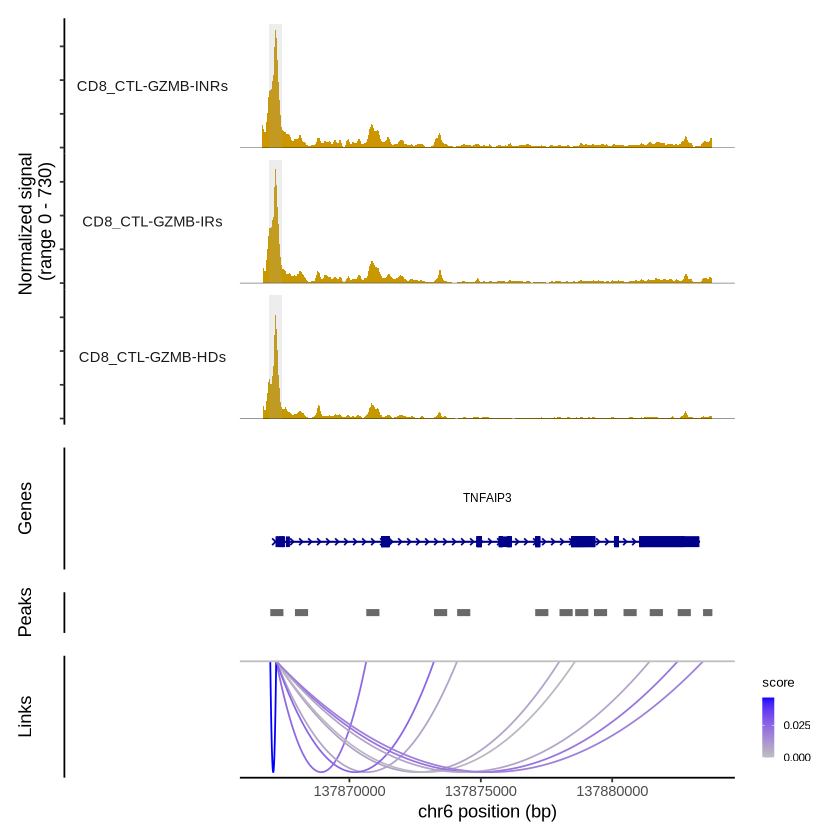

In [ ]:
CoveragePlot(  
  object = scATAC,  
  region = "TNFAIP3",
  group.by = "celltypeL3_stage",
  extend.upstream = 500, 
  extend.downstream = 500,
  ymax = 730 ,
  region.highlight = highlight_region,
  cells = selected_cells  # 指定细胞 
)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


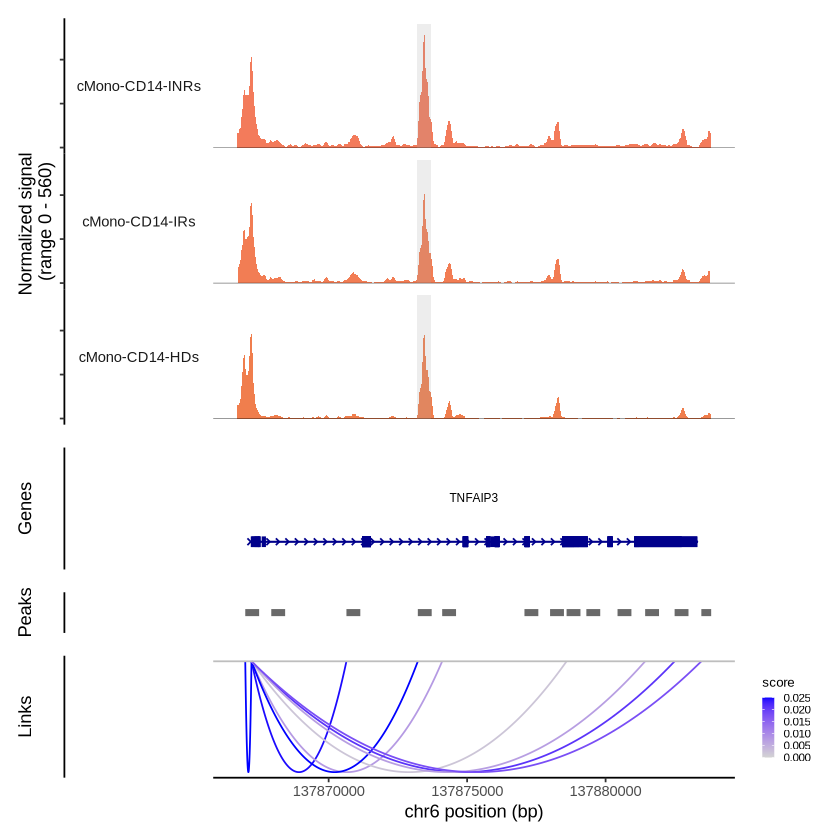

In [ ]:
p <- CoveragePlot(
    object = scATAC,
    region = "TNFAIP3",
    group.by = "celltypeL3_stage",
    extend.upstream = 500,
    extend.downstream = 500,
    region.highlight = highlight_region,
    cells = selected_cells
)

coverage_plot_index <- 1

# 获取覆盖度子图
coverage_sub_plot <- p[[coverage_plot_index]]

# 修改覆盖度子图的颜色比例尺
modified_coverage_sub_plot <- coverage_sub_plot +
  scale_color_gradientn(
    colors = c("lightgrey", "blue"),
    limits = c(0, 0.025),
    oob = scales::squish
  )

p[[coverage_plot_index]] <- modified_coverage_sub_plot
print(p)

In [ ]:
output_pdf_path <- "/home/share/huadjyin/home/lutianyu/01HIV/02data/downstream/permutaion/TNFAIP3/cMonoCD14-scorelink.pdf"

ggsave(
  filename = output_pdf_path,
  plot = p,
  device = "pdf",
  width = 10,
  height = 8
)


In [ ]:
pdf("/home/share/huadjyin/home/lutianyu/01HIV/02data/downstream/peak2gene/TNFRSF1B/12184198-12184699.pdf", width = 8, height = 10)  

CoveragePlot(  
  object = scATAC,  
  region = "TNFRSF1B",  # 指定基因或基因组区域  
  group.by = "celltypeL3_stage",  # 使用自定义分组变量  
  extend.upstream = 0, 
  extend.downstream = 0,
  #ymax = 500 ,
  region.highlight = highlight_region,
  cells = selected_cells  # 指定细胞 
)
dev.off()

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."


pdf 
  2

# 细胞类型L3层次分组的score

主要只是画出link线

In [4]:
library(dplyr)
peak2gene <- read.csv("/home/share/huadjyin/home/lutianyu/01HIV/02data/l3_sigpeak_group_filtered/NFKBIA.csv", check.names = FALSE)


In [11]:
filtered_data <- peak2gene %>%
  dplyr::filter(`rna_stage` == "HDs" & `celltype-l3` == "cDC2-CD1C")

filtered_data <- filtered_data[, -c(1, 2), drop = FALSE]
filtered_data <- as.data.frame(t(filtered_data))
colnames(filtered_data) <- "score"
filtered_data$Region <- rownames(filtered_data)
rownames(filtered_data) <- NULL
filtered_data$gene <- "NFKBIA"
filtered_data <- filtered_data[, c("gene", "Region", "score")]

sub_peak2gene <- filtered_data
sub_peak2gene$gene_tss <- 35404749

region_split <- strsplit(sub_peak2gene$Region, "[:-]")
sub_peak2gene$seqnames <- sapply(region_split, `[`, 1)  # 提取染色体名称
sub_peak2gene$peakstart <- as.numeric(sapply(region_split, `[`, 2))  # 提取起始位置
sub_peak2gene$peakend <- as.numeric(sapply(region_split, `[`, 3))  # 提取终止位置

# 创建 start 和 end 列
sub_peak2gene$start <- ifelse(
  sub_peak2gene$peakstart > sub_peak2gene$gene_tss,
  sub_peak2gene$gene_tss,  # 如果 peakstart > gene_tss，start = gene_tss
  sub_peak2gene$peakstart  # 否则，start = peakstart
)

sub_peak2gene$end <- ifelse(
  sub_peak2gene$peakstart > sub_peak2gene$gene_tss,
  sub_peak2gene$peakstart,  # 如果 peakstart > gene_tss，end = peakstart
  sub_peak2gene$gene_tss    # 否则，end = gene_tss
)
sub_peak2gene

gene,Region,score,gene_tss,seqnames,peakstart,peakend,start,end
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
NFKBIA,chr14:35261731-35262232,1.394858e-03,35404749,chr14,35261731,35262232,35261731,35404749
NFKBIA,chr14:35285384-35285885,3.851469e-02,35404749,chr14,35285384,35285885,35285384,35404749
NFKBIA,chr14:35416055-35416556,2.301362e-04,35404749,chr14,35416055,35416556,35404749,35416055
NFKBIA,chr14:35286097-35286598,1.249828e-02,35404749,chr14,35286097,35286598,35286097,35404749
NFKBIA,chr14:35254743-35255244,1.801781e-03,35404749,chr14,35254743,35255244,35254743,35404749
NFKBIA,chr14:35384226-35384727,2.294550e-03,35404749,chr14,35384226,35384727,35384226,35404749
NFKBIA,chr14:35286706-35287207,5.908858e-03,35404749,chr14,35286706,35287207,35286706,35404749
NFKBIA,chr14:35398177-35398678,9.828313e-03,35404749,chr14,35398177,35398678,35398177,35404749
NFKBIA,chr14:35416800-35417301,4.489617e-04,35404749,chr14,35416800,35417301,35404749,35416800


## 挑选出有意义的peak

In [ ]:
per_peak <- read.csv("/home/share/huadjyin/home/lutianyu/01HIV/02data/downstream/permutaion/NFAIP3/ncMono-IFI44L_INRs.csv")
per_peak$peak_id <- sub("-", ":", per_peak$peak_id)

filtered_per_peak <- per_peak[per_peak$p_value < 0.05, ]
filtered_per_peak


,peak_id,gene_id,observed_correlation,mean_background_correlation,std_background_correlation,z_score,p_value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,chr19:45469091-45469592,FOSB,-0.06991188,-0.002792274,0.03202268,-2.096002,0.03608197
24,chr19:45475596-45476097,FOSB,0.07361687,0.009648534,0.02877482,2.223066,0.02621134


In [145]:
sub_peak2gene2 <- sub_peak2gene[sub_peak2gene$Region %in% filtered_per_peak$peak_id, ]
sub_peak2gene2

,gene,Region,score,gene_tss,seqnames,peakstart,peakend,start,end
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
7,FOSB,chr19:45475596-45476097,0.09519842,45467995,chr19,45475596,45476097,45467995,45475596
9,FOSB,chr19:45469091-45469592,0.02788109,45467995,chr19,45469091,45469592,45467995,45469091


## 挑选出特定的peak

In [12]:
regions_to_select <- c(
'chr14:35480349-35480850'
)

sub_peak2gene2 <- sub_peak2gene[sub_peak2gene$Region %in% regions_to_select, ]
sub_peak2gene2

,gene,Region,score,gene_tss,seqnames,peakstart,peakend,start,end
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
23,NFKBIA,chr14:35480349-35480850,0.009083633,35404749,chr14,35480349,35480850,35404749,35480349


In [13]:
# 8. 转换为 GRanges 格式  
links <- makeGRangesFromDataFrame(  
  sub_peak2gene2,
  keep.extra.columns = TRUE  
)

# 将 links 添加到 ATAC 对象
Links(scATAC) <- links

# 定义细胞类型  
cell_types <- c("cDC2-CD1C")

# 筛选细胞  
selected_cells <- rownames(scATAC@meta.data[  
  scATAC@meta.data$celltype_L3 %in% cell_types,   
]) 

highlight_region <- GRanges(
  seqnames = "chr1",  # 染色体名称
  ranges = IRanges(
    start = 35399055,  # 起始位置
    end = 35399556  # 终止位置
  ),
  color = "#A9A9A9"    # 设置高亮颜色为深灰色
)


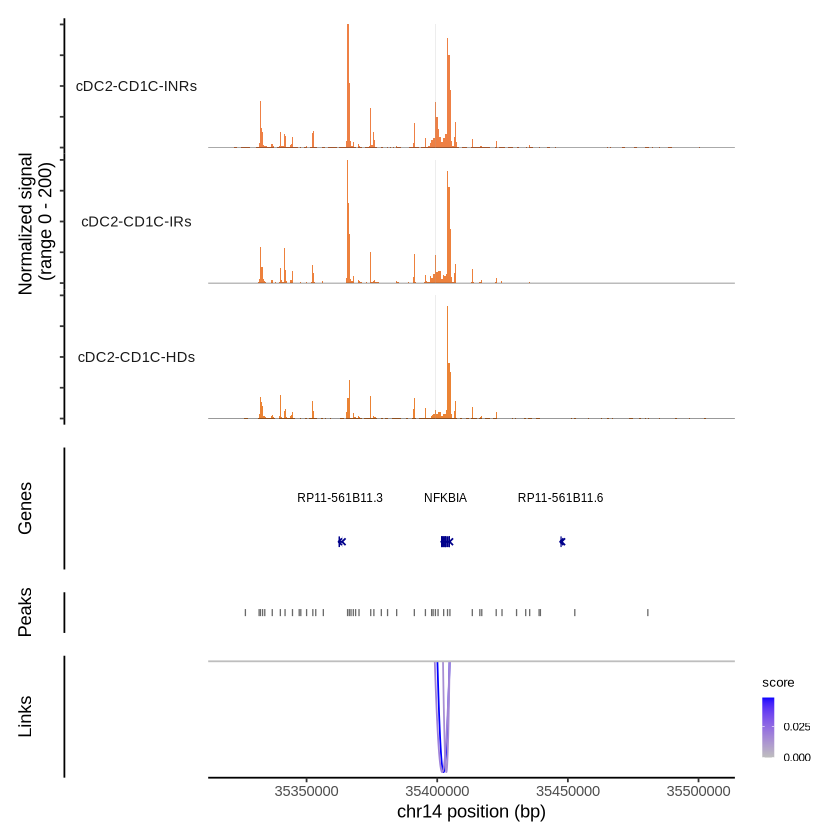

In [47]:
CoveragePlot(
  object = scATAC,
  region = "NFKBIA",  # 指定基因或基因组区域  
  group.by = "celltypeL3_stage",  # 使用自定义分组变量  
  extend.upstream = 80000,
  extend.downstream = 100000,
  ymax = 200 ,
  region.highlight = highlight_region,
  cells = selected_cells  # 指定细胞 
)

In [14]:
p <- CoveragePlot(
  object = scATAC,
  region = "NFKBIA",
  group.by = "celltypeL3_stage",
  extend.upstream = 80000,
  extend.downstream = 100000,
  ymax = 200 ,
  region.highlight = highlight_region,
  cells = selected_cells
)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


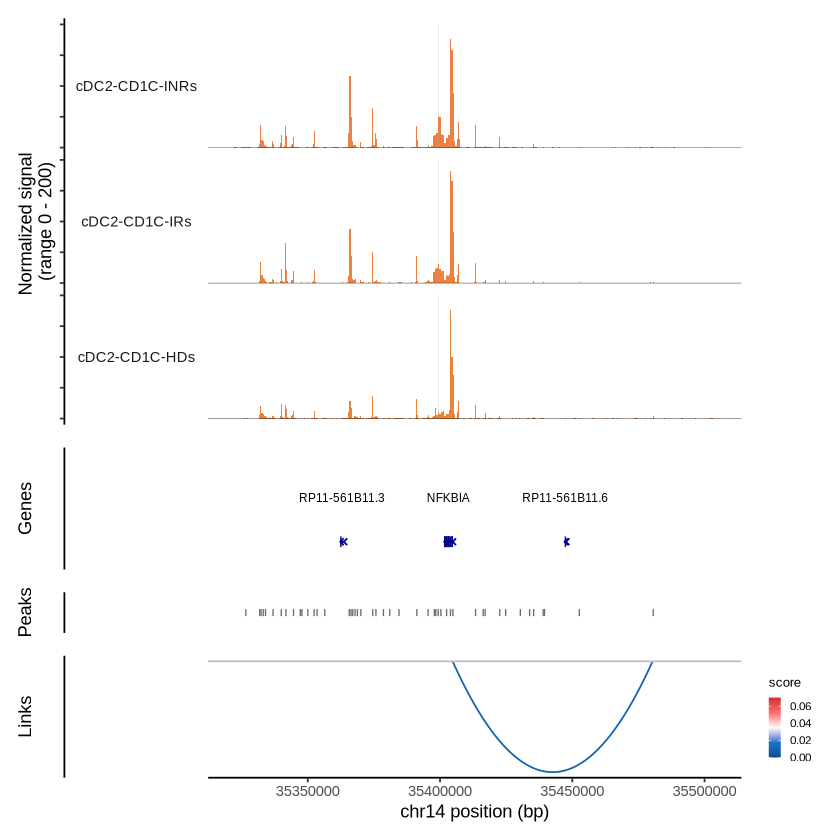

In [15]:
coverage_plot_index <- 1

# 获取覆盖度子图
coverage_sub_plot <- p[[coverage_plot_index]]

# 修改覆盖度子图的颜色比例尺
modified_coverage_sub_plot <- coverage_sub_plot +
  scale_color_gradientn(
    colors = c("#104E8B", "#1874CD", "#FFFAFA", "#FF6A6A", "#CD3333"),
    limits = c(0, 0.07),
    oob = scales::squish
  )

# 将修改后的子图替换回 patchwork 对象
p[[coverage_plot_index]] <- modified_coverage_sub_plot

# 打印最终的 patchwork 对象
print(p)

In [16]:
output_pdf_path <- "/home/share/huadjyin/home/lutianyu/01HIV/02data/downstream/IGtest/NFKBIA/cDC2-CD1C_link_HDs.pdf"

ggsave(
  filename = output_pdf_path,
  plot = p,
  device = "pdf",
  width = 20,
  height = 8
)
